In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cubic_spline_interpolation_matrix_method(x, y):
    n = len(x)
    h = np.diff(x)
    b = np.diff(y) / h

    # Set up the system of equations
    A = np.zeros((n, n))
    rhs = np.zeros(n)

    # Natural spline boundary conditions
    A[0, 0] = 1
    A[n-1, n-1] = 1

    for i in range(1, n-1):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        rhs[i] = 3 * (b[i] - b[i-1])

    # Solve for the second derivatives
    c = np.linalg.solve(A, rhs)

    # Calculate the first derivatives and coefficients
    a = y[:-1]
    b = np.diff(y) / h - h * (2 * c[:-1] + c[1:]) / 3
    d = np.diff(c) / (3 * h)

    return a, b, c[:-1], d

In [3]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 8, 9, 1, -8])


In [7]:
a, b, c, d = cubic_spline_interpolation_matrix_method(x, y)
a


array([0, 8, 9, 1])

In [5]:
def cubic_spline(x, a, b, c, d, x_val):
    n = len(a)
    for i in range(n-1):
        if x[i] <= x_val <= x[i+1]:
            dx = x_val - x[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    return None


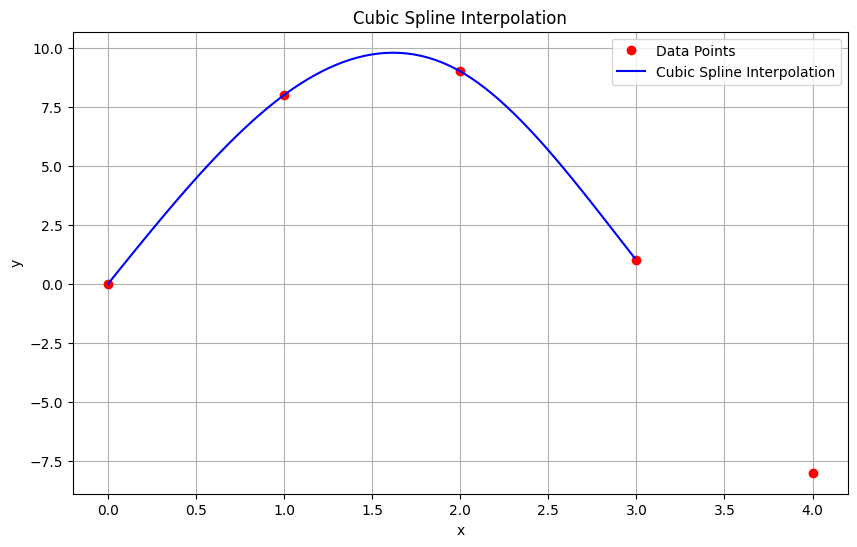

In [6]:
# Generate points for plotting
x_plot = np.linspace(x[0], x[-1], 100)
y_plot = [cubic_spline(x, a, b, c, d, xi) for xi in x_plot]
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Data Points')
plt.plot(x_plot, y_plot, 'b-', label='Cubic Spline Interpolation')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [13]:
def cubic_spline_interpolation(x, y, xp):
    h = np.diff(x)
    n = len(x) - 1
    dy = np.diff(y)
    
    A = np.zeros((n-1, n+1))
    B = np.zeros(n-1)
    M = np.zeros(n+1)
    
    for i in range(0, n-1):
        A[i, i] = h[i]
        A[i, i+1] = 2 * (h[i] + h[i+1])
        A[i, i+2] = h[i+1]
        B[i] = 6 * (dy[i+1]/h[i+1] - dy[i]/h[i])
        
    # Solve for M:M[1:n]
    A[0, 0] = 1
    A[n-2, n-1] = 1
    M[1:n] = np.linalg.solve(A[:,1:n], B)
    M[0] = 0
    M[n] = 0
    
    # Calculate coefficients
    a = y[:-1]
    b = dy / h - h * (2 * M[:-1] + M[1:]) / 6
    c = M[:-1] / 2
    d = np.diff(M) / (6 * h)
    
    
    # Evaluate the spline at xp
    yp = np.zeros_like(xp)
    for i in range(n):
        mask = (xp >= x[i]) & (xp <= x[i+1])
        dx = xp[mask] - x[i]
        yp[mask] = a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    return yp
    

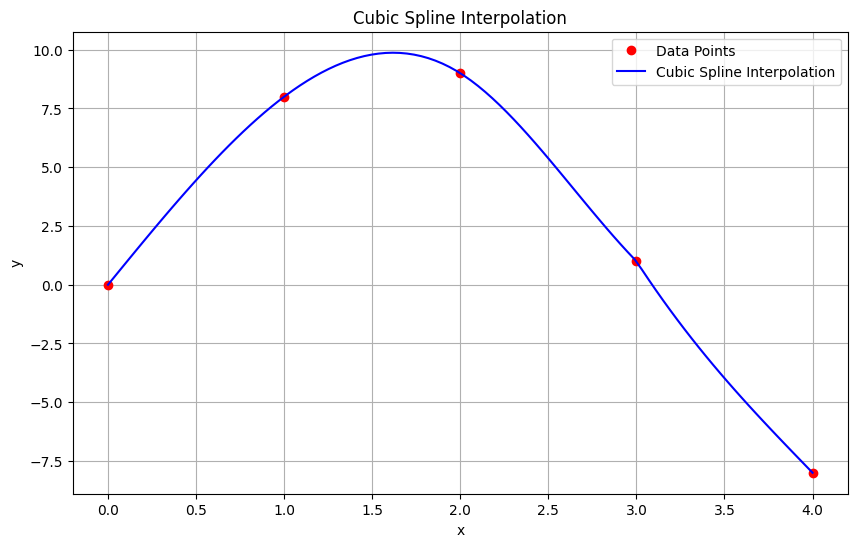

In [14]:
# Example usage
xp = np.linspace(x[0], x[-1], 100)
yp = cubic_spline_interpolation(x, y, xp)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Data Points')
plt.plot(xp, yp, 'b-', label='Cubic Spline Interpolation')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()